In [1]:

from datasets import load_dataset
ds = load_dataset("Teklia/RIMES-2011-line")
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 10188
    })
    validation: Dataset({
        features: ['image', 'text'],
        num_rows: 1138
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 778
    })
})


In [3]:
from matplotlib import pyplot as plt
def show_samples(dataset, num_samples=5, split="train"):
    samples = dataset[split].shuffle(seed=42).select(range(num_samples))  # Shuffle and select samples

    # Adjusting layout for better visualization
    num_cols = 2  # Display in two columns
    num_rows = (num_samples + 1) // num_cols  # Determine the number of rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 2.5))
    axes = axes.flatten()

    for i, example in enumerate(samples):
        image = example["image"]
        text = example["text"]

        axes[i].imshow(image.convert("L"), cmap="gray")  # Convert to grayscale
        axes[i].set_title(text, fontsize=8)
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

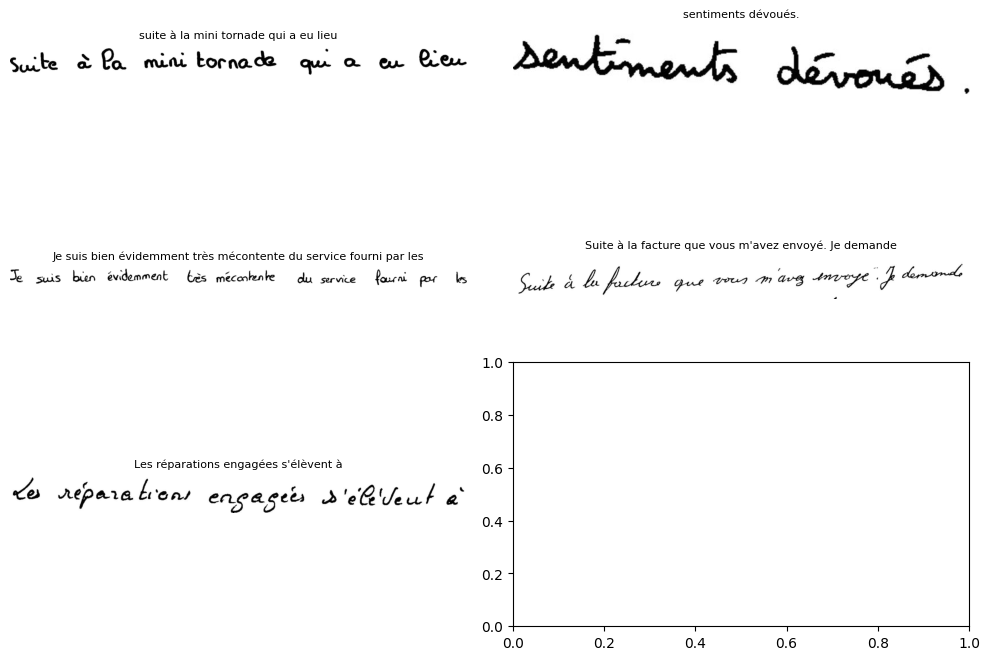

In [4]:
show_samples(ds, num_samples=5, split="train")

In [5]:
!pip install torch torchvision torchaudio datasets pytorch-lightning numpy opencv-python matplotlib Pillow


You should consider upgrading via the 'C:\Users\aksha\OneDrive\Desktop\genAI\rem_mediquery\venv88\Scripts\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 2.4/2.4 MB 5.8 MB/s eta 0:00:00
     -------------------------------------- 819.3/819.3 KB 4.7 MB/s eta 0:00:00
     -------------------------------------- 927.3/927.3 KB 4.5 MB/s eta 0:00:00


In [6]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import cv2


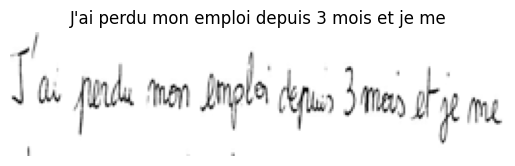

In [9]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((64, 256), interpolation=Image.BICUBIC),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])

# Check a sample image after transformation
sample_image = ds["train"][0]["image"]
transformed_image = transform(sample_image)

plt.imshow(transformed_image.squeeze(), cmap="gray")
plt.title(ds["train"][0]["text"])
plt.axis("off")
plt.show()

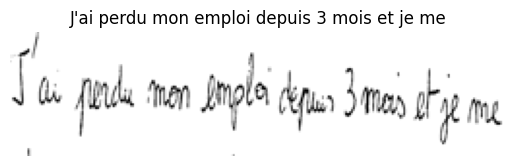

In [12]:
import cv2
import numpy as np
from PIL import Image

def enhance_image(image):
    image = np.array(image.convert("L"))  # Convert to grayscale NumPy array

    # Apply adaptive thresholding
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 2)

    # Morphological operations to remove noise
    kernel = np.ones((2,2), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)  # Close small gaps
    image = cv2.medianBlur(image, 3)  # Reduce background noise

    # Contrast stretching
    min_pixel, max_pixel = np.percentile(image, (2, 98))  # Get min and max intensity
    image = np.clip((image - min_pixel) * (255.0 / (max_pixel - min_pixel)), 0, 255)
    image = image.astype(np.uint8)

    return Image.fromarray(image)  # Convert back to PIL

# Apply enhancement before transformations
sample_image = ds["train"][0]["image"]
enhanced_image = enhance_image(sample_image)
transformed_image = transform(enhanced_image)

plt.imshow(transformed_image.squeeze(), cmap="gray")
plt.title(ds["train"][0]["text"])
plt.axis("off")
plt.show()


In [14]:
class RIMESDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = sample["image"]
        text = sample["text"]

        # Enhance image (denoising, thresholding, contrast)
        image = enhance_image(image)

        # Apply transforms if provided
        if self.transform:
            image = self.transform(image)

        return image, text  # Returning (Tensor Image, Label)

# Apply transformations to the dataset
train_dataset = RIMESDataset(ds["train"], transform=transform)
test_dataset = RIMESDataset(ds["test"], transform=transform)


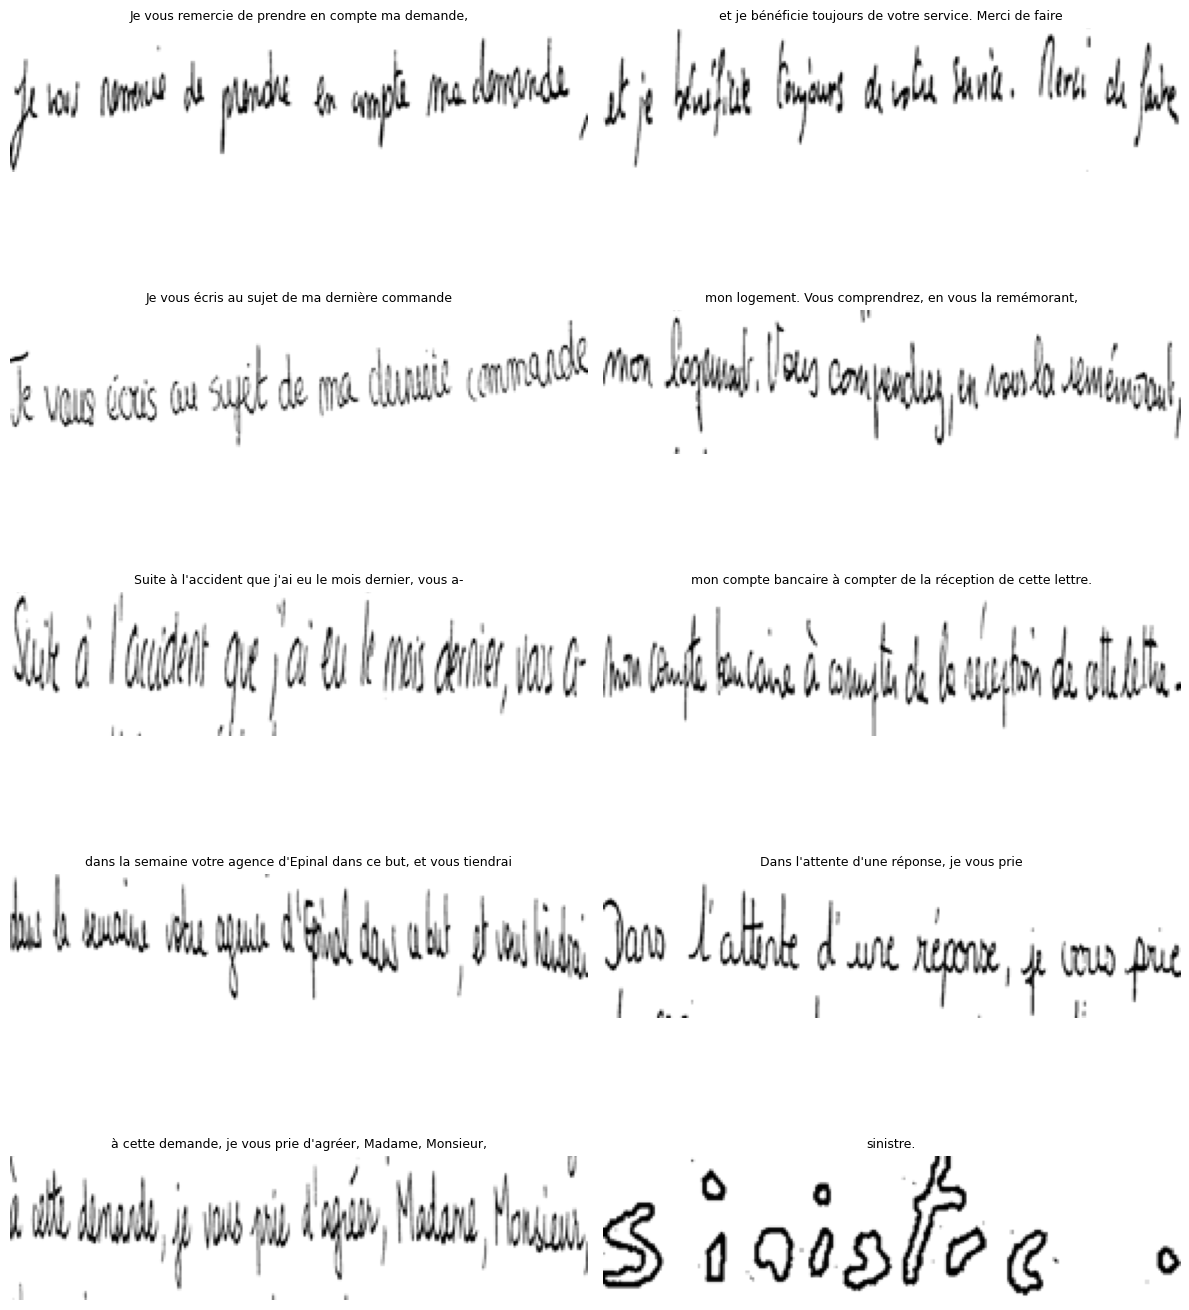

In [16]:
def show_transformed_samples(dataset, num_samples=10):
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    samples = [dataset[int(i)] for i in indices]  # Convert NumPy int to Python int

    num_cols = 2
    num_rows = (num_samples + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 3))
    axes = axes.flatten()

    for i, (image, text) in enumerate(samples):
        axes[i].imshow(image.squeeze(), cmap="gray")  # Display transformed image
        axes[i].set_title(text, fontsize=9)
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Call function to visualize 10 transformed samples
show_transformed_samples(train_dataset, num_samples=10)


In [3]:
from datasets import load_dataset
dataset = load_dataset("Teklia/IAM-line")


In [4]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 6482
    })
    validation: Dataset({
        features: ['image', 'text'],
        num_rows: 976
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 2915
    })
})


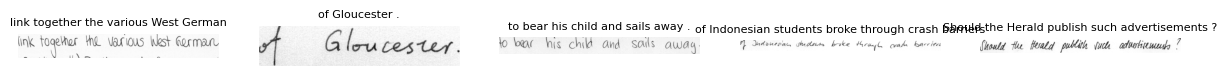

In [5]:
import matplotlib.pyplot as plt

def show_samples(dataset, num_samples=5, split="train"):
    samples = dataset[split].shuffle(seed=42).select(range(num_samples))
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    
    for i, example in enumerate(samples):
        image = example["image"]
        text = example["text"]

        axes[i].imshow(image.convert("L"), cmap="gray")
        axes[i].set_title(text, fontsize=8)
        axes[i].axis("off")

    plt.show()

show_samples(dataset, num_samples=5, split="train")


In [6]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import cv2




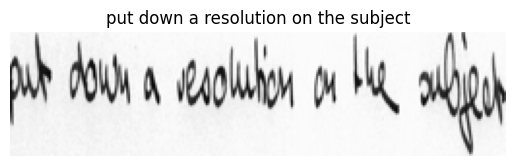

In [7]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((64, 256), interpolation=Image.BICUBIC),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])

# Check a sample image after transformation
sample_image = dataset["train"][0]["image"]
transformed_image = transform(sample_image)

plt.imshow(transformed_image.squeeze(), cmap="gray")
plt.title(dataset["train"][0]["text"])
plt.axis("off")
plt.show()

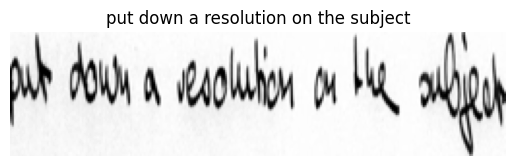

In [9]:
import cv2
import numpy as np
from PIL import Image

def enhance_image(image):
    image = np.array(image.convert("L"))  # Convert to grayscale NumPy array

    # Apply adaptive thresholding
    cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 8)


    # Morphological operations to remove noise
    kernel = np.ones((2,2), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)  # Close small gaps
    image = cv2.GaussianBlur(image, (3, 3), 0)
 # Reduce background noise

    # Contrast stretching
    min_pixel, max_pixel = np.percentile(image, (2, 98))  # Get min and max intensity
    image = np.clip((image - min_pixel) * (255.0 / (max_pixel - min_pixel)), 0, 255)
    image = image.astype(np.uint8)

    return Image.fromarray(image)  # Convert back to PIL

# Apply enhancement before transformations
sample_image = dataset["train"][0]["image"]
enhanced_image = enhance_image(sample_image)
transformed_image = transform(enhanced_image)

plt.imshow(transformed_image.squeeze(), cmap="gray")
plt.title(dataset["train"][0]["text"])
plt.axis("off")
plt.show()


In [15]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import numpy as np
import cv2
from PIL import Image
import copy  # To create a backup of the dataset

class IAMDataset(Dataset):
    def __init__(self, dataset, transform=None, apply_preprocessing=True):
        """
        Custom dataset class for handwritten text recognition.

        Args:
        - dataset (list/dict): Original dataset.
        - transform (torchvision.transforms.Compose): Transformation pipeline.
        - apply_preprocessing (bool): Whether to apply image enhancement.
        """
        self.dataset = copy.deepcopy(dataset)  # Backup original dataset
        self.transform = transform
        self.apply_preprocessing = apply_preprocessing

    def enhance_image(self, image):
        """
        Preprocess image by applying adaptive thresholding, morphological operations,
        and contrast stretching.
        """
        image = np.array(image.convert("L"))  # Convert to grayscale NumPy array

        # Apply adaptive thresholding
        image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                      cv2.THRESH_BINARY, 15, 8)

        # Morphological operations to remove noise
        kernel = np.ones((2,2), np.uint8)
        image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)  # Close small gaps
        image = cv2.GaussianBlur(image, (3, 3), 0)  # Reduce background noise

        # Contrast stretching
        min_pixel, max_pixel = np.percentile(image, (2, 98))  
        image = np.clip((image - min_pixel) * (255.0 / (max_pixel - min_pixel)), 0, 255)
        image = image.astype(np.uint8)

        return Image.fromarray(image)  # Convert back to PIL

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = sample["image"]
        text = sample["text"]

        # Apply preprocessing if enabled
        if self.apply_preprocessing:
            image = self.enhance_image(image)

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, text  # Return transformed image & corresponding label

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 256), interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create dataset instances
train_dataset = IAMDataset(dataset["train"], transform=transform, apply_preprocessing=True)
test_dataset = IAMDataset(dataset["test"], transform=transform, apply_preprocessing=True)


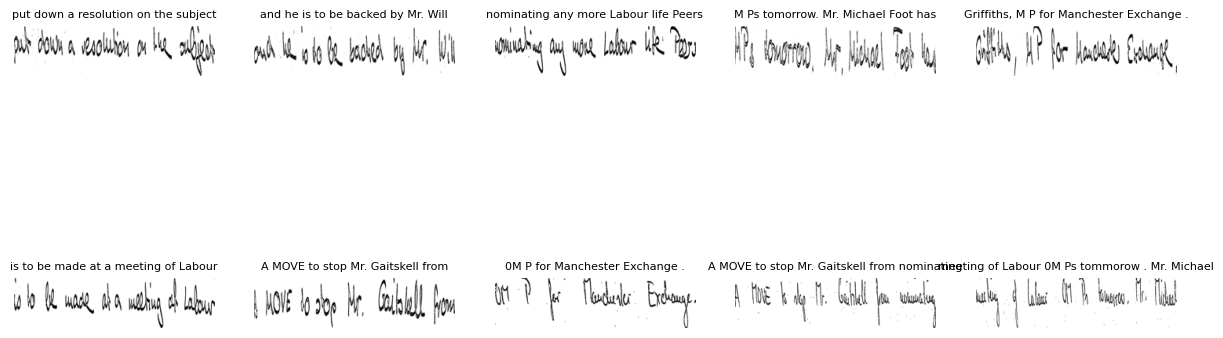

In [17]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

import matplotlib.pyplot as plt

def show_samples(dataset, num_samples=10):
    fig, axes = plt.subplots(2, num_samples // 2, figsize=(15, 6))

    for i in range(num_samples):
        image, text = dataset[i]
        
        ax = axes[i // (num_samples // 2), i % (num_samples // 2)]
        ax.imshow(image.squeeze(), cmap="gray")
        ax.set_title(text, fontsize=8)
        ax.axis("off")

    plt.show()

# Display 10 random samples from the training dataset
show_samples(train_dataset, num_samples=10)



Image Type: <class 'torch.Tensor'>
Image Shape: torch.Size([1, 64, 256])
Pixel Range: (-1.0, 1.0)


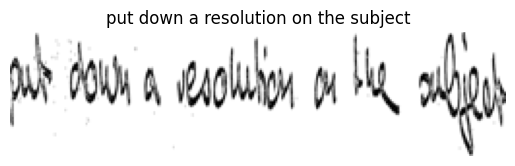

In [18]:
# Check if transformations are applied
image, text = train_dataset[0]  # Get one sample

print("Image Type:", type(image))
print("Image Shape:", image.shape)  # Should be [1, 64, 256] if transformed
print("Pixel Range:", (image.min().item(), image.max().item()))  # Should be around (-1, 1) if normalized

plt.imshow(image.squeeze(), cmap="gray")
plt.title(text)
plt.axis("off")
plt.show()


In [19]:
images, labels = next(iter(train_loader))  # Get one batch
print("Batch Shape:", images.shape)  # Should be [16, 1, 64, 256] if batch_size=16


Batch Shape: torch.Size([16, 1, 64, 256])


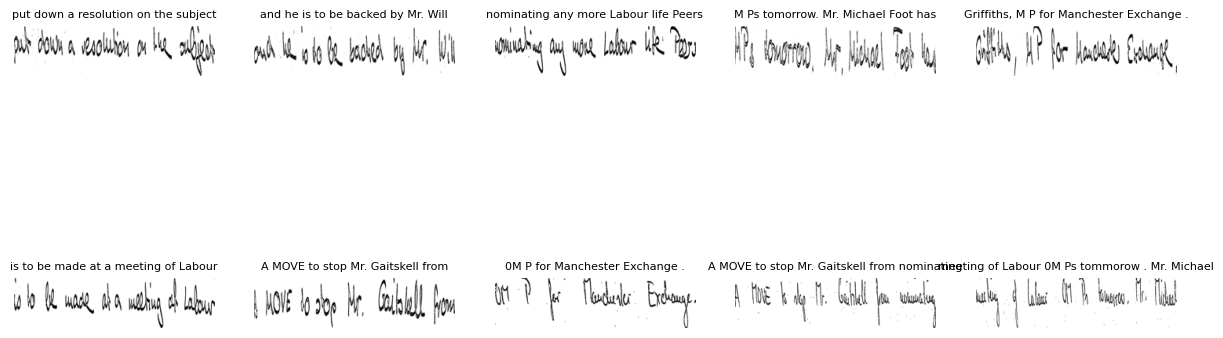

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 Rows, 5 Cols

for i, ax in enumerate(axes.flat):
    image, label = train_dataset[i]  # Get sample
    ax.imshow(image.squeeze(), cmap="gray")
    ax.set_title(label, fontsize=8)
    ax.axis("off")

plt.show()


In [21]:
torch.save(train_dataset, "backup_train_dataset.pt")
torch.save(test_dataset, "backup_test_dataset.pt")


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CRNN(nn.Module):
    def __init__(self, num_classes):
        super(CRNN, self).__init__()

        # CNN for Feature Extraction
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),  # (32x128)

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),  # (16x64)

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),  # (16x64)

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 1)),  # (8x64)

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),  # (8x64)

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d((2, 1)),  # (4x64)

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),  # (4x64)
        )

        # BiLSTM for Sequence Modeling
        self.rnn = nn.LSTM(512, 256, bidirectional=True, num_layers=2, batch_first=True)

        # Fully Connected Layer
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.cnn(x)  # Shape: [batch, channels, height, width]
        
        # Print the shape of the feature map after CNN layers to debug
        print("Feature map shape after CNN:", x.shape)
        
        # Ensure the feature map has the correct dimensions for LSTM
        batch_size, channels, height, width = x.size()
        
        # Flatten the feature map so it matches (batch_size, seq_len, feature_size)
        seq_len = width  # width corresponds to seq_len in text recognition
        feature_size = channels  # channels corresponds to the feature size (512)
        
        # Reshape to (batch_size, seq_len, feature_size)
        x = x.view(batch_size, seq_len, feature_size)
        
        # Print the shape before passing to LSTM to debug
        print("Shape before passing to LSTM:", x.shape)

        # Pass through LSTM
        x, _ = self.rnn(x)
        
        # Fully connected layer (classification layer)
        x = self.fc(x)

        return x


In [46]:

characters = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,;:/()[]{}#&$%+-=~<>*^'\"@_ \n\t"

# Define CTC Loss
ctc_loss = nn.CTCLoss(blank=0, reduction='mean', zero_infinity=True)  # Blank token index 0

# Define Optimizer
model = CRNN(num_classes=len(characters) + 1)  # +1 for CTC blank token
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [47]:
for images, texts in train_loader:
    print(texts)  # Check the text labels being passed
    #targets, target_lengths = encode_texts(texts, characters)
def encode_texts(texts, characters):
        """
        Convert a list of text labels into integer-encoded sequences and their lengths.
        
        Args:
            texts (list of str): List of ground truth text labels.
            characters (str): All possible characters in the dataset (including a blank token).
        
        Returns:
            targets (torch.Tensor): Integer-encoded text labels (padded).
            target_lengths (torch.Tensor): Lengths of each text label in the batch.
        """
        char_to_idx = {char: idx for idx, char in enumerate(characters)}
        blank_idx = char_to_idx[' ']  # Ensure that ' ' is the blank token in the character set
        
        encoded_texts = []
        target_lengths = []

        for text in texts:
            # Encode each character, use blank_idx for any unknown characters
            encoded_text = [char_to_idx.get(char, blank_idx) for char in text]  
            encoded_texts.append(encoded_text)
            target_lengths.append(len(encoded_text))  # Length of each encoded text label

        # Pad the sequences to the maximum length in the batch
        max_length = max(target_lengths)
        padded_targets = [seq + [0] * (max_length - len(seq)) for seq in encoded_texts]

        targets = torch.LongTensor(padded_targets)  # Convert to LongTensor
        target_lengths = torch.LongTensor(target_lengths)  # Convert to LongTensor

        return targets, target_lengths





('Cecil searched in his pockets once', 'case into hiding between the do-it-yourself cupboard', 'simply planed to give the required taper . In', 'brought to his notice .', 'tribute to the development of the', 'in response to the Budgette appeal .', 'angelo Antonioni\'s " La Notte . " The num-', 'floundered on to the electrocution', "you know how she has a good look round everywhere . ' There was", 'be accepted by both East and West . "', 'film so vividly to life . In Fanny , which', 'Ministers concerned with overseas aspects', 'salve Blue Streak , which was abandoned last summer', 'British membership of Nato and British', 'lupins and numerous others .', "arrangement with the dead lady's sister")
("chapter in the history of Anglesey's unceasing search", 'crochet hooks range in size from number 3/0 ,', 'To put it in a slightly different way , do not allow', 'Meanwhile Mr. Moncrieff had sent me an', 'troubles , mourning a terrible air crash ,', 'whether at Holy Loch or elsewhere on', 'I ha